In [197]:
import scipy as sp
import scipy.io
import numpy as np
import os
os.sys.path.append('./behavior')
from behavior_analysis import process_data as pd
from behavior_analysis import loadmat_sbx
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas 

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
CaDataDir = "Z://2P_data/2AFC_V3/4058541.1/CA1/"
info = loadmat_sbx(CaDataDir + "/rawDat/CA1_005_001.mat")['info']

mouse = "4058541.1"
vr_dir = "Z://VR/2AFC_V3/"
sess = "2AFC_Test_PostSurg_5_imaging_"
c = pd(mouse,sess,basedir='work')

In [104]:
behavior = c.align_to_ca(sess,info)
# behavior_dict = behavior.to_dict()
# print(behavior_dict.keys())
# sp.io.savemat("CA1_005_001_behavior.mat",behavior_dict)

dict_keys(['ca_inds', 'morph', 'port1 licks', 'port2 licks', 'position', 'rewards', 'side', 'speed'])


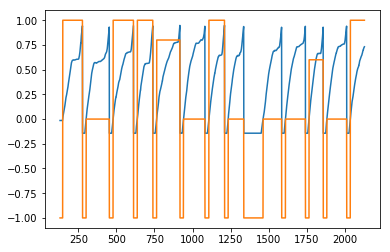

In [92]:
plt.plot(behavior['ca_inds'].values[0:2000],
         behavior['position'].values[0:2000]/350,
         behavior['ca_inds'].values[0:2000],
         behavior['morph'][0:2000].values)

In [85]:
import h5py
ca_dat = {}
with h5py.File(CaDataDir+"CA1_005_001_cnmf_results.mat",'r') as f:
    for k,v in f.items():
        ca_dat[k] = np.array(v)
#ca_dat = sp.io.loadmat(CaDataDir+"CA1_005_001_cnmf_results.mat")

In [94]:
print(ca_dat.keys())
print(ca_dat['C_dec'].shape)
print(behavior['morph'].shape)
#print(behavior['ca_'])

dict_keys(['A_keep', 'C_dec', 'C_keep', 'F0', 'F_dff', 'R_keep', 'S_dec', 'S_keep'])
(33354, 940)
(33210,)


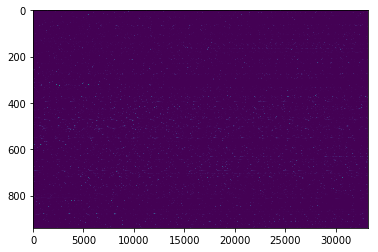

In [95]:
f,ax = plt.subplots()
f.figsize = (30, 30)

plt.imshow(ca_dat['C_dec'][behavior['ca_inds'].values,:].T,aspect='auto')


# PCA using whole scan to do PCA

In [190]:
pca = PCA()
C_dec = sp.stats.zscore(ca_dat['C_dec'][behavior['ca_inds'].values,:],axis=0)
C_pca = pca.fit_transform(C_dec)

In [191]:
print(C_pca.shape)

(33210, 940)


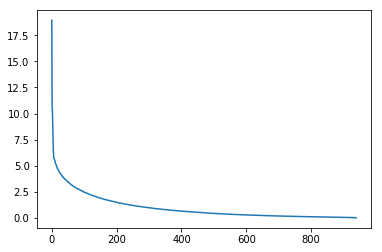

In [192]:
plt.plot(pca.explained_variance_)

Text(0.5,1,'Colored by Context')

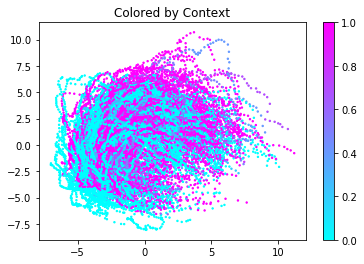

In [193]:
trialMask = behavior['morph'].values!=-1
plt.scatter(C_pca[trialMask,1],C_pca[trialMask,2],c=behavior['morph'].values[trialMask],cmap='cool',s=2)
plt.colorbar()
plt.title('Colored by Context')

Text(0,0.5,'PC2')

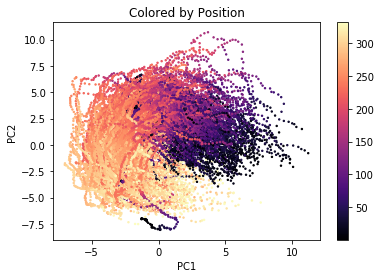

In [194]:
trialMask = behavior['morph'].values!=-1
plt.scatter(C_pca[trialMask,1],C_pca[trialMask,2],c=behavior['position'].values[trialMask],cmap='magma',s=2)
plt.colorbar()
plt.title('Colored by Position')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0.5,1,'Colored by Speed')

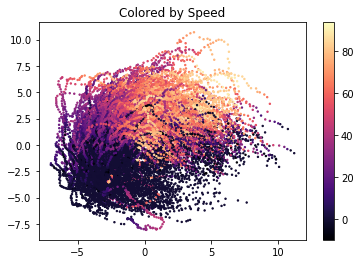

In [178]:
trialMask = behavior['morph'].values!=-1 
speed = behavior['speed'].values
speed[speed<-10] = 0
plt.scatter(C_pca[trialMask,1],C_pca[trialMask,2],
            c=speed[trialMask],cmap='magma',s=2)
plt.colorbar()
plt.title('Colored by Speed')

# Restrict analysis to first half of track

In [179]:
pca = PCA()
print(C_dec.shape)
first_half_mask = np.where((behavior['position'].values<175) & (behavior['position'].values>0))

C_pca = pca.fit_transform(C_dec[first_half_mask[0],:])


(33210, 940)


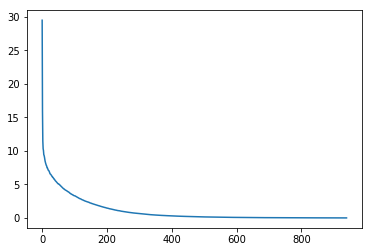

In [180]:
plt.plot(pca.explained_variance_)

Text(0.5,1,'Colored by Context')

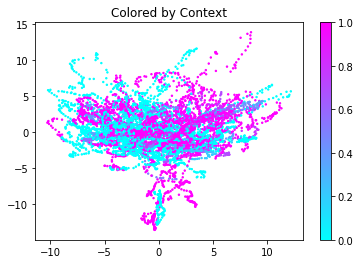

In [181]:

plt.scatter(C_pca[:,1],C_pca[:,2],c=behavior['morph'].values[first_half_mask],cmap='cool',s=2)
plt.colorbar()
plt.title('Colored by Context')

Text(0.5,1,'Colored by Position')

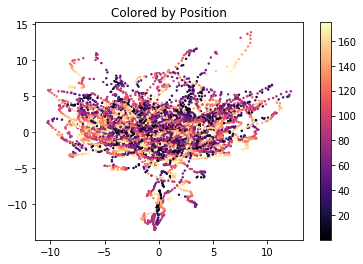

In [182]:
plt.scatter(C_pca[:,1],C_pca[:,2],c=behavior['position'].values[first_half_mask],cmap='magma',s=2)
plt.colorbar()
plt.title('Colored by Position')

Text(0.5,1,'Colored by speed')

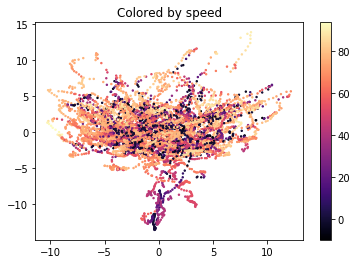

In [183]:
plt.scatter(C_pca[:,1],C_pca[:,2],c=behavior['speed'].values[first_half_mask],cmap='magma',s=2)
plt.colorbar()
plt.title('Colored by speed')

# Second half of track

In [184]:
pca = PCA()
#C_dec = ca_dat['C_dec'][behavior['ca_inds'].values,:]
second_half_mask = np.where(behavior['position'].values>175)

C_pca = pca.fit_transform(C_dec[second_half_mask[0],:])


Text(0.5,1,'Colored by Context')

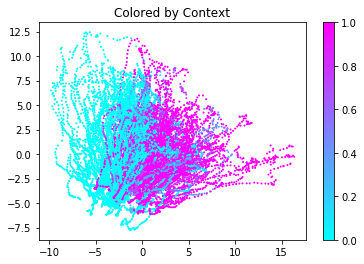

In [188]:

plt.scatter(C_pca[:,1],C_pca[:,2],c=behavior['morph'].values[second_half_mask],cmap='cool',s=1)
plt.colorbar()
plt.title('Colored by Context')

Text(0.5,1,'Colored by Position')

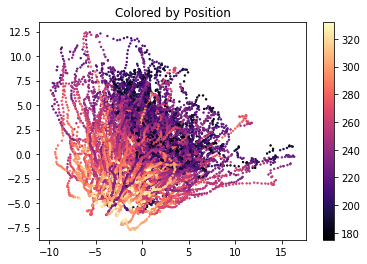

In [186]:

plt.scatter(C_pca[:,1],C_pca[:,2],c=behavior['position'].values[second_half_mask],cmap='magma',s=2)
plt.colorbar()
plt.title('Colored by Position')

Text(0.5,1,'Colored by Speed')

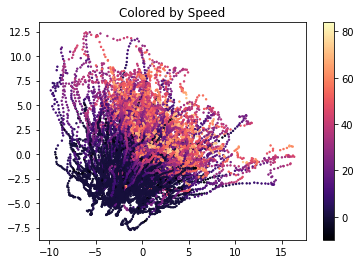

In [187]:
plt.scatter(C_pca[:,1],C_pca[:,2],c=behavior['speed'].values[second_half_mask],cmap='magma',s=2)
plt.colorbar()
plt.title('Colored by Speed')

# LDA

In [201]:
# perform dimensionality reduction leaving out morph trials
lda = LDA(n_components=1)

base_trial_mask = np.where(((behavior['morph'].values==1) | (behavior['morph'].values==0)) & (behavior['position'].values>0))
trial_mask = np.where(behavior['position'].values>0)
C_base_lda = lda.fit_transform(C_dec[base_trial_mask[0],:],behavior['morph'].values[base_trial_mask[0]])


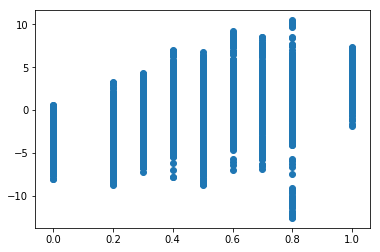

In [203]:
C_lda = lda.transform(C_dec)

#plt.scatter(behavior['morph'].values[base_trial_mask[0]],C_base_lda)
f,ax = plt.subplots()
ax.scatter(behavior['morph'].values[trial_mask[0]],C_lda[trial_mask[0]])

In [ ]:
# plot probabilities instead of projection

In [ ]:
# plot maze start triggered projection/probability, mid point triggered, and reward triggered

engram type analysis
average activity of cells in either context

average activity of cells in morph context

take inner product with the two averages

Look at transition probabilities between different states (binarize data)

How frequently are particular states observed ? are they ever observed more than once?
